### 다항회귀: X값은 하나, 제곱이 들어가
### 다중회귀: X값이 여러개 (X1, X2, X3)

In [31]:
import numpy as np

In [32]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [33]:
# Train과 Test로 나누기
from sklearn.model_selection import train_test_split

In [34]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_length, fish_weight, test_size=0.2, random_state=42
)

In [35]:
train_input # 현재 1차원 배열 > sklearn에서는 2차원 배열로 변환해야 함. 인식 못 함.

array([28. , 27.3, 19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. ,
       22. , 20. , 22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. ,
       32.8, 26.5, 36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. ,
       21. , 23. , 22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [36]:
train_input = train_input.reshape(-1, 1) # 행은 모르겠고 열은 1개로 맞춤
test_input = test_input.reshape(-1, 1)

In [37]:
# knn import
from sklearn.neighbors import KNeighborsRegressor

In [38]:
knr = KNeighborsRegressor(n_neighbors=3) # 23번에서 해보니 3이 괜찮은 것 같음
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

---
### 길이가 50cm인 생선의 무게를 예측

In [39]:
knr.predict([[50]])

array([1033.33333333])

---
### 기존 데이터로 무게 확인

In [40]:
print(train_target.max())
print(train_input.max())
# 44cm인 것이 1100 > 예측이 이상함

1100.0
44.0


### 산점도로 이웃을 구해서 확인해보기

In [41]:
import matplotlib.pyplot as plt

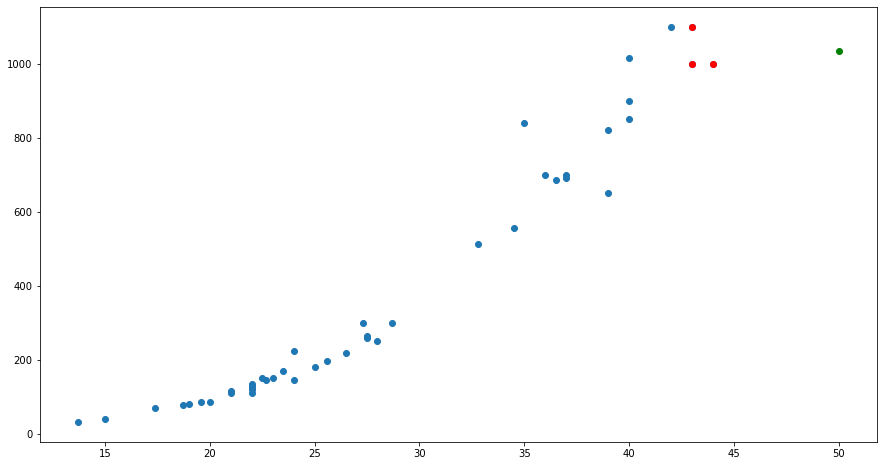

In [42]:
# 50cm인 이웃을 구함
distance, indices = knr.kneighbors([[50]])

plt.figure(figsize=(15, 8))

# 훈련세트의 산점도를 표시
plt.scatter(train_input, train_target, label='train')

# 위에서 구한 이웃 샘플만 다시 표시
plt.scatter(train_input[indices], train_target[indices], label='neighbors', c='r')

# 50cm 생선의 예측값을 표시
plt.scatter(50, knr.predict([[50]]), label='prediction', c='g')

plt.show()

### 결론: 주변 데이터로 예측하는 KNR로 이걸 예측할 수는 없다

---
# 선형회귀
: 직선이나 고선의 함수식(y = aX + b)을 이용하여 구하는 방식. 로지스틱 회귀분석이나 인공신경망의 기초가 되었다.

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(train_input, train_target)

LinearRegression()

In [46]:
lr.predict([[50]])

array([1238.3175398])

In [47]:
# y = aX + b 에서 a, b를 찾아보자 (Deep Learning에서는 Weight와 Bias로 불림)
print('a :', lr.coef_)
print('b :', lr.intercept_)
# 언더바로 끝나는 애들은 함수에서 만들어낸 변수들이다.

a : [39.05365447]
b : -714.3651839448929


#### a는 list, b는 int로 나누는 이유
- 다항식에서 a1X1 + a2X2 등 a는 많아질 수 있기 때문
- b는 딥러닝에 가도 하나뿐

### 산점도 그려보기

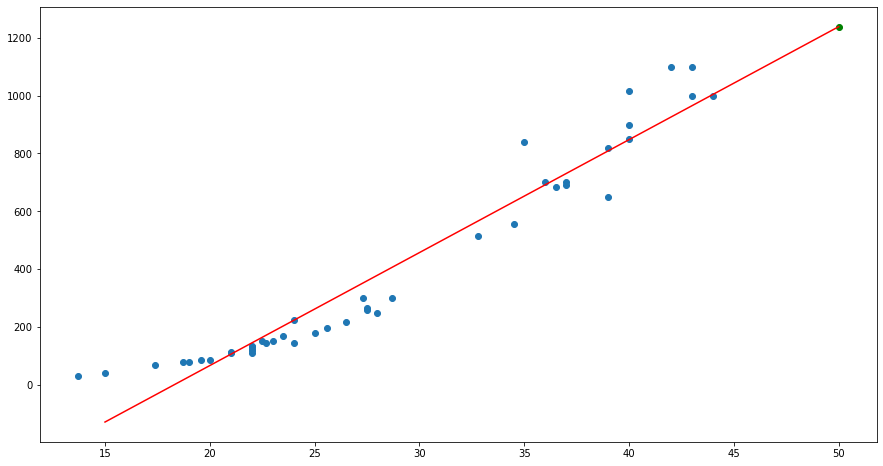

In [48]:
plt.figure(figsize=(15, 8))

# 훈련세트의 scatter plot 그려보기
plt.scatter(train_input, train_target, label='train')

# # 예측값을 그려보기
# plt.plot(train_input, lr.predict(train_input), label='prediction', c='r')

# 15~ 50cm 생선의 예측값을 그려보기
plt.plot(
  [15, 50],
  [lr.predict([[15]])[0], lr.predict([[50]])[0]],
  label='prediction', c='r'
)

# 50cm 생선의 예측값을 표시
plt.scatter(50, lr.predict([[50]]), label='prediction', c='g')

plt.show()

### 절편이 음수 > 길이가 작아지면 무게가 음수가 발생 가능

In [49]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9363463656327585
0.8359630155975613


### 현재 매우 과대적합 상태

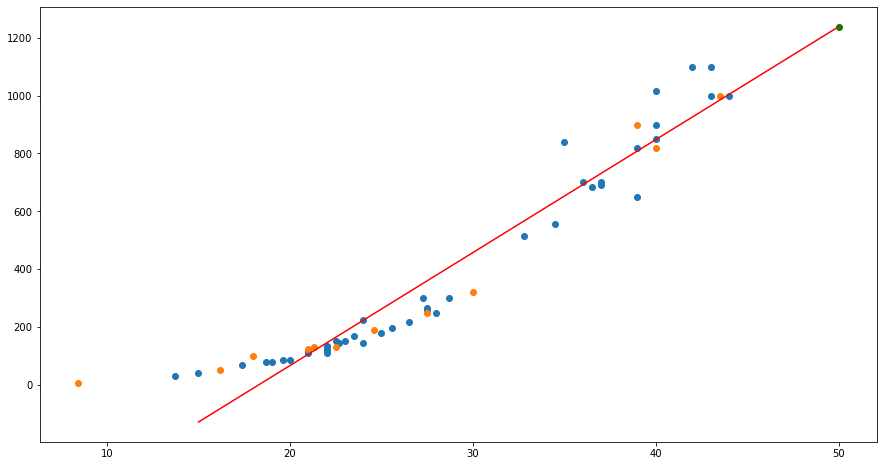

In [50]:
plt.figure(figsize=(15, 8))

# 훈련세트의 scatter plot 그려보기
plt.scatter(train_input, train_target, label='train')

# Test세트의 scatter plot 그려보기
plt.scatter(test_input, test_target, label='test')

# 15~ 50cm 생선의 예측값을 그려보기
plt.plot(
  [15, 50],
  [lr.predict([[15]])[0], lr.predict([[50]])[0]],
  label='prediction', c='r'
)

# 50cm 생선의 예측값을 표시
plt.scatter(50, lr.predict([[50]]), label='prediction', c='g')

plt.show()

### 해결하기 위해
- 다항회귀를 사용해 그래프를 휘어보자(R에서는 못함)

---
### 다항 회귀 
Y = $ax^2$ +bX +C 
- 항이 여러개 있고 feature가 하나인 것을 이미 
- feature가 여러개인것은 다중회귀

In [51]:
# feature를 제곱한 column을 생성하여 기존의 column에 붙인다.
train_poly = np.column_stack((train_input **2 , train_input))
# ax^2
test_poly = np.column_stack((test_input **2 , test_input)) # ???

In [52]:
print(train_poly.shape, test_input.shape)

(44, 2) (12, 1)


In [53]:
# 모델 적용
lr = LinearRegression()
# 학습
lr.fit(train_poly , train_target)
# 50cm 생선에 대한 예측 (기존의 예측값 1238.3175398)
lr.predict([[50**2,50]])

array([1579.0440311])

In [54]:
# 기울기와 절편
print(lr.coef_ , lr.intercept_)

[  1.03238928 -22.63525541] 129.83360652841554


In [55]:
lr.fit(train_poly, train_target)

LinearRegression()

In [56]:
lr.predict([[50**2, 50]])

array([1579.0440311])

In [57]:
# 구간별 직선 그리기(15~49까지 정수)
points = np.arange(15, 50)

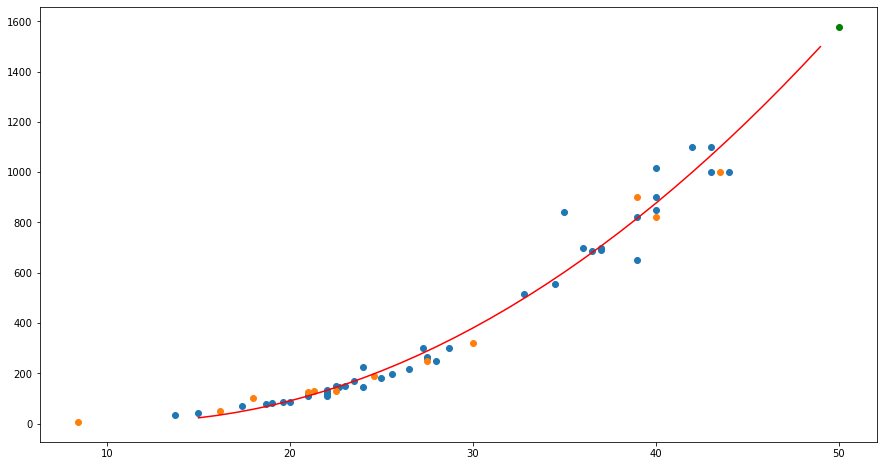

In [58]:
# 훈련 세트의 산점도 그리기
plt.figure(figsize=(15, 8))
plt.scatter(train_input, train_target, label='train')
# 테스트 세트의 산점도 그리기
plt.scatter(test_input, test_target, label='test')

# points에 대한 예측값을 그려보기
plt.plot(points, lr.predict(np.column_stack((points ** 2, points))), label='prediction', c='r')
# plt.plot(
#   points,
#   1.03 * points ** 2 - 22.6 * points + 129,
#   label='prediction', c='r'
# )

# 50cm 생선의 예측값을 표시
plt.scatter(50, lr.predict([[50**2, 50]]), label='prediction', c='g')

plt.show()

In [59]:
# 과대적합, 과소적합 확인
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 약간의 과소적합이 발생하지만 훨씬 낫다
# 3%까지는 용납 가능

0.9701854947585989
0.9801885585527479


---